# [CSCV 471]

## Competition 1

### Kemy Howard Cheramy

In [376]:
import warnings
warnings.filterwarnings('ignore')

In [377]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Add any other libraries you need
from sklearn.ensemble import RandomForestClassifier

## Section 1: Data Preprocessing and Feature Engineering

This section should cover all the steps you have taken to prepare your data for modeling, including data cleaning, normalization, feature selection, handling missing values, etc.

### 1.1- Loading the datasets to learn more about the data

In [378]:
# Load the dataset
datasetTrain = pd.read_csv('datasets/train.csv')
datasetTest  = pd.read_csv('datasets/test.csv')
pd.set_option('display.max_columns', None)

datasetTrain

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53476,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0
53477,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0
53478,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0
53479,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0


### 1.2- Exploration of the Data

In [379]:
datasetTrain[datasetTrain.isnull().any(axis=1)]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label


In this section of the code, we checked for missing values using the Pandas library. After executing the code, as shown in the output above, an empty DataFrame was returned, indicating that there are no missing values in the training dataset.

### 1.3 Structure and Visualisation

#### 1- Structure of dataset

In [380]:
#Getting all the numerical column names and a summary description of 
numericalSlice  = datasetTrain.select_dtypes(include=['number'])
numerical_summary  = datasetTrain.select_dtypes(include=['number']).describe()
numericalColumns   = datasetTrain.select_dtypes(include=['number']).columns.tolist()
numberOfNumCol     = len(numericalColumns)

print(f"Number of Numerical Columns>>> {numberOfNumCol} || List of Numerical Column Names \n {str(numericalColumns)} \n")
numerical_summary


Number of Numerical Columns>>> 41 || List of Numerical Column Names 
 ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'] 



,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,53481.000000,53481.000000,53481.000000,53481.000000,5.348100e+04,5.348100e+04,5.348100e+04,53481.000000,53481.000000,5.348100e+04,5.348100e+04,53481.000000,53481.000000,53481.000000,53481.000000,5.348100e+04,53481.000000,53481.000000,5.348100e+04,5.348100e+04,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,5.348100e+04,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000,53481.000000
mean,44237.641387,1.229739,25.900525,25.437969,1.147179e+04,1.959038e+04,4.399341e+04,142.431723,117.482863,4.947304e+07,9.678869e+05,6.778501,9.256895,1114.520409,135.998226,6.475724e+03,677.115639,175.278286,1.411844e+09,1.399375e+09,167.315477,0.070183,0.036927,0.033256,161.420037,168.471420,0.131467,2.366468e+03,5.480731,1.143565,2.992857,1.811335,1.333932,3.617752,0.012621,0.012771,0.185561,3.865074,5.061330,0.017128,0.308166
std,24598.719276,5.039664,164.940588,140.892978,2.119676e+05,1.850039e+05,1.165728e+05,107.051570,117.202300,1.864712e+08,2.913522e+06,79.770843,67.999306,7612.578266,1430.666046,5.545892e+04,3903.200778,118.203238,1.432481e+09,1.425904e+09,121.113637,0.134137,0.083272,0.063406,227.853277,282.253702,0.660521,4.702233e+04,5.604392,1.223979,3.234564,1.797230,1.081092,5.122258,0.112302,0.113939,0.776555,4.089103,5.357822,0.129748,0.461740
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,27643.000000,0.001034,2.000000,0.000000,2.000000e+02,0.000000e+00,2.455874e+01,31.000000,0.000000,8.678046e+03,0.000000e+00,0.000000,0.000000,0.011000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41013.000000,0.249650,10.000000,8.000000,8.400000e+02,3.540000e+02,8.707811e+01,62.000000,29.000000,8.241823e+04,5.476258e+03,2.000000,1.000000,19.677518,1.750260,8.955074e+02,34.156691,255.000000,1.030841e+09,1.002866e+09,255.000000,0.000718,0.000562,0.000150,83.000000,56.000000,0.000000,0.000000e+00,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000
75%,68962.000000,0.912476,16.000000,18.000000,2.100000e+03,1.860000e+03,5.142405e+03,254.000000,252.000000,1.747516e+06,2.759852e+05,4.000000,4.000000,77.576767,74.093141,3.960423e+03,163.396734,255.000000,2.657545e+09,2.632227e+09,255.000000,0.127917,0.066050,0.058407,130.000000,124.000000,0.000000,0.000000e+00,7.000000,2.000000,4.000000,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,5.000000,7.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294950e+09,4.294881e+09,255.000000,3.821465,3.226788,2.928778,1502.000000,1500.000000,131.000000,5.242880e+06,49.000000,6.000000,48.000000,18.000000,14.000000,63.000000,2.000000,2.000000,16.000000,41.000000,48.000000,1.000000,1.000000


> Based on the summary of the numerical columns, there is a wide and diverse range of variation among the features. This generally indicates that feature scaling 
> will be necessary, especially if we plan to use distance-based models.

In [381]:
#Getting all the categorical column names and a summary description of 
categorical_summary  = datasetTrain.select_dtypes(include=['object', 'category']).describe()
categoricalColumns   = datasetTrain.select_dtypes(include=['object', 'number']).columns.tolist()
numberOfCatCol     = len(categoricalColumns)

print(f"TRAINING DATASET \nNumber of Categorical Columns>>> {numberOfCatCol} || List of Categorical Column Names \n{str(categoricalColumns)} \n")
categorical_summary


TRAINING DATASET 
Number of Categorical Columns>>> 45 || List of Categorical Column Names 
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'] 



,proto,service,state,attack_cat
count,53481,53481,53481,53481
unique,131,13,6,5
top,tcp,-,FIN,Normal
freq,36766,37835,33027,37000


>In this part of the project, we generated a brief summary of the dataset and noticed that it includes categorical features. This insight is essential for 
>understanding the nature of the dataset and guiding further analysis or preprocessing steps, such as encoding categorical variables for our model.

In [382]:
#Getting all the categorical column names and a summary description of 
categorical_summary_test  = datasetTest.select_dtypes(include=['object', 'category']).describe()
categoricalColumnsTest   = datasetTest.select_dtypes(include=['object', 'category']).columns.tolist()
numberOfCatColTest     = len(categoricalColumnsTest)

print(f"TESTING DATASET \nNumber of Categorical Columns>>> {numberOfCatColTest} || List of Categorical Column Names \n{str(categoricalColumnsTest)} \n")
categorical_summary_test

TESTING DATASET 
Number of Categorical Columns>>> 4 || List of Categorical Column Names 
['proto', 'service', 'state', 'attack_cat'] 



,proto,service,state,attack_cat
count,105403,105403,105403,105403
unique,133,13,9,5
top,tcp,-,FIN,Normal
freq,61927,67274,59818,56000


>Both the training and testing datasets have four (4) categorical columns: `proto`, `service`, `state`, and `attack_cat`, with the latter (attack_cat) being the target feature used throughout this project for our model. A few observations:

>- The `proto` column has a large number of unique values, so we should be prepared to handle a significant number of encoded columns during preprocessing.
>- The `proto`, `service`, and `state` columns do not have exactly the same unique values across the training and testing datasets. Therefore, it is crucial to account for how unrecognized or missing categories (NaN values) will be handled during encoding to avoid inconsistencies during model training and testing.

In [383]:
# Distribution of our classes. in the training dataset
datasetTrain['attack_cat'].value_counts()


attack_cat
Normal      37000
Exploits    11132
DoS          4089
Analysis      677
Backdoor      583
Name: count, dtype: int64

>By examining the overall distribution of the dataset across the five (5) categories, we found that the attack_cat column, the target variable in our model, is highly imbalanced, with the majority class having 37,000 occurrences, while other categories like "Exploits" (11,132), "DoS" (4,089), "Analysis" (677), and "Backdoor" (583) are significantly underrepresented. This suggests that during the process of building our classification model, we will likely need to employ class balancing techniques.

#### 2- Visualizing Relationships

In [384]:
# Data exploration and visualization
# Explore the dataset, check for missing values, visualize relationships, etc.

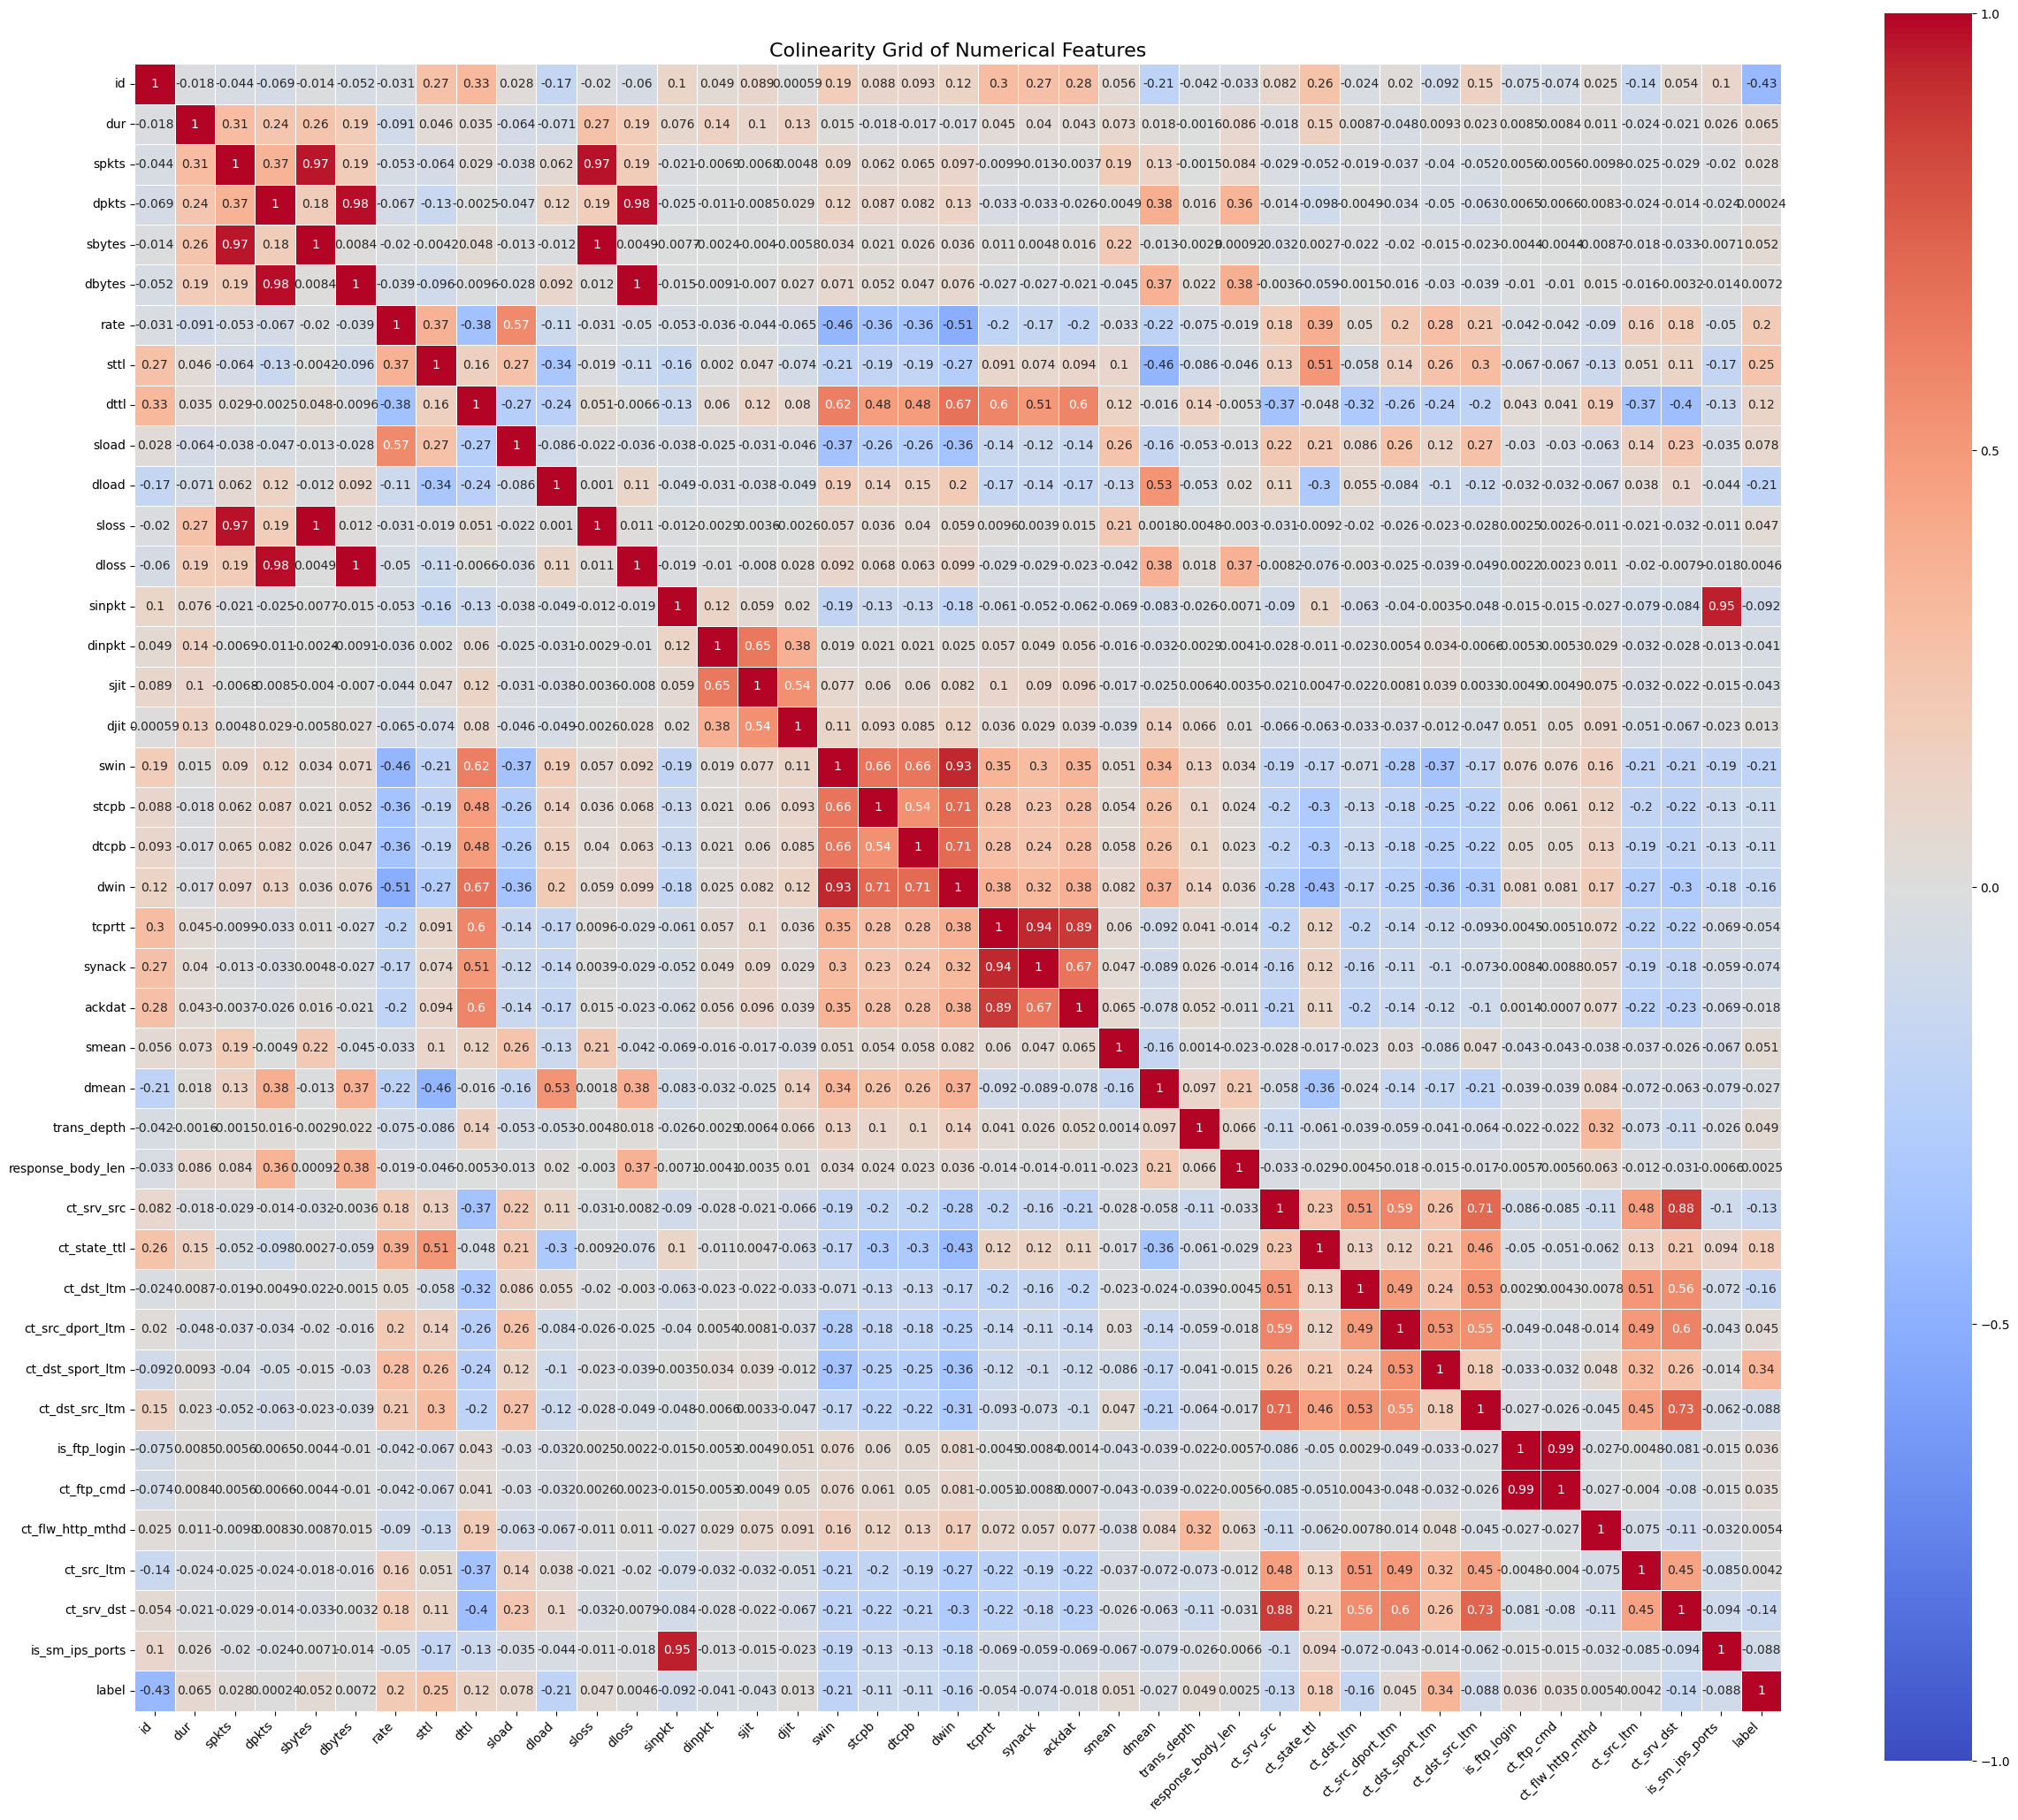

In [385]:
# Create a correlation matrix
correlation_matrix = numericalSlice.corr()

# Plot the heatmap for colinearity with detailed features
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, square=True, 
            cbar_kws={"shrink": 0.8, "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Colinearity Grid of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

>We have a large number of features to work with, so a global analysis and visualization approach will be the most effective way to tackle much of the project. In this case, to visualize how the numerical features of the training dataset relate to each other, we used a correlation matrix with a color-coded heatmap for easy interpretation. From the heatmap, we can already observe that most of the features are not strongly correlated. However, some pairs, such as `dloss` and `dpkts`, show a very high correlation between them, and that will be very helpful in the process of selecting features for our model. We can take it a step further by plotting the two previously mentioned features to confirm their correlation.

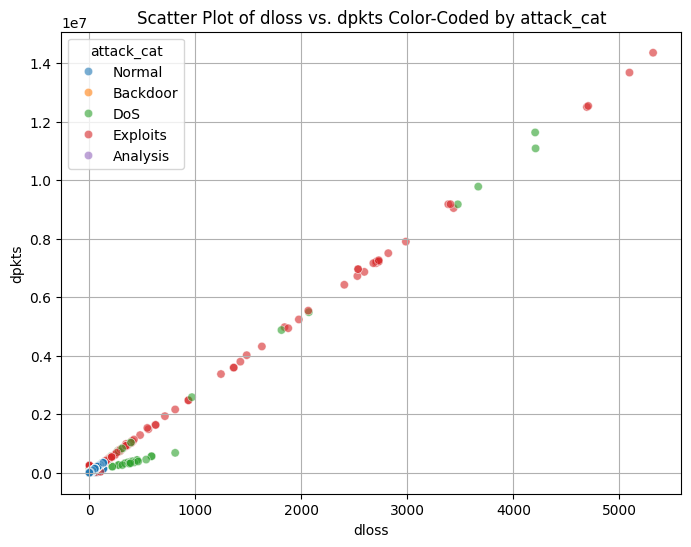

In [386]:

# Scatter plot of dloss vs. dpkts to visualize correlation
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sloss', y='sbytes', hue='attack_cat', data=datasetTrain, alpha=0.6,  palette=custom_palette )
plt.title('Scatter Plot of dloss vs. dpkts Color-Coded by attack_cat')
plt.xlabel('dloss')
plt.ylabel('dpkts')
plt.grid(True)
#plt.tight_layout()

plt.show()

In [387]:
# Data preprocessing
# Handle missing values, categorical data, feature scaling, etc.

### 1.4- Data Preprocessing

### 1- Missing Values

As established in part 1.2, there are no missing values in the dataset. Therefore, it is unnecessary to implement configurations for handling missing data.

#### 2- Feature engineering

a- Feature Selection (part 1))

In the process of building our model we are tasked to select at least five (5) features that we think will foster a better separability bettween the classes of our dataset, through our model. We took several steps to select our features. The first step is to avoid pairs of features with high colinearity.

In [388]:
def remove_elements(col_name_list, to_remove):
    # Create a new list excluding the elements to remove
    return [element for element in col_name_list if element not in to_remove]

In [389]:
# First we have to drop unimportant columns
datasetTrain = datasetTrain.drop(['id', 'label'], axis=1) #'attack_cat' is our feature class.. Not label.
numericalAndBinary = datasetTrain.select_dtypes(include=['number']).columns.tolist()

# Separating Numerical from binary for better handling
binaryCol = ['is_sm_ips_ports', 'is_ftp_login'] #By checking te feature document provided and verifying unique values.

numericalCol = remove_elements(numericalAndBinary, binaryCol) 
print(len(numericalCol))

37


In [390]:
# Compute the correlation matrix for numerical columns in datasetTrain
# 'corr()' calculates the pairwise correlation between each numerical feature
corr_grid = datasetTrain[numericalCol].corr()

# Define a threshold for determining high correlation.
# We are considering a correlation to be "highly correlated" if its absolute value is greater than 0.9 (threshold).
# Values close to 1 or -1 indicate strong positive or negative correlations respectively.
threshold = 0.9

# This line retrieves the pairs of variables (columns) from the correlation grid that meet the high correlation criteria.
# We are looking for pairs where:
# 1. The correlation value between the two variables is greater than 0.9 or less than -0.9 (positive or negative high correlation).
# 2. The two variables must be different (row != col) to avoid self-correlation.
# This creates a list of tuples where each tuple is a pair of variables that are highly correlated.
high_corr = [(row, col) for row in corr_grid.index for col in corr_grid.columns 
             if (corr_grid.loc[row, col] > threshold or corr_grid.loc[row, col] < -threshold) and row != col]

# Remove duplicate pairs of variables.
# In a correlation matrix, the correlation between variable A and variable B is the same as between B and A.
# Hence, to avoid duplicate pairs, this line sorts each pair (e.g., (A, B) and (B, A) would both become (A, B)).
# The 'set()' function is used to remove duplicates, and 'sorted()' ensures that the tuple is in a consistent order.
# The result is converted back to a list to store unique pairs.
high_corr = list(set(tuple(sorted(pair)) for pair in high_corr))

# Print the number of highly correlated pairs found
print(len(high_corr))

# Print each highly correlated pair of variables
# Each pair represents two variables with a strong correlation (either positive or negative)
for x in high_corr:
    print(x)


8
('sloss', 'spkts')
('synack', 'tcprtt')
('dwin', 'swin')
('sbytes', 'sloss')
('dbytes', 'dloss')
('sbytes', 'spkts')
('dbytes', 'dpkts')
('dloss', 'dpkts')


>We now have the pairs of highly correlated features. Next, we will manually select one feature from each pair, based solely on the high correlation between them. In this project and based on the list above, we decided to keep the features `'synack', 'sbytes', 'dbytes', 'dwin'`. The following code will handle the removal of the other feature names from our numerical features list.

In [391]:
# 'to_keep' is a list of features that have been manually selected to retain, being part of a highly correlated pair.
to_keep = ['synack', 'sbytes', 'dbytes', 'dwin']

# Initialize an empty list to collect all variables involved in high-correlation pairs.
all_variable_from_list_of_pairs = []

# This creates a flat list containing all variables involved in high-correlation pairs.
for x in high_corr:
    for e in x:
        all_variable_from_list_of_pairs.append(e)

# Create a new list 'numericalCol' by filtering the original 'numericalCol' list.
# The goal is to remove highly correlated variables unless they are specifically listed in 'to_keep'.
# For each variable (e) in 'numericalCol':
# - If the variable is part of 'all_variable_from_list_of_pairs' and not in 'to_keep', it will be excluded.
# - If the variable is in 'to_keep', it will be retained, even if it is part of a high-correlation pair.
numericalCol = [e for e in numericalCol if e not in all_variable_from_list_of_pairs or e in to_keep]

# Print the number of remaining numerical columns after filtering
print(len(numericalCol))


31


a- Feature Selection (part 1)

>After eliminating some features based on correlation, we now have slightly fewer features to handle. This part of the project discusses the reasons behind the selection of the features used to build our classification model. It defines each attack category while highlighting the features that are likely indicators of the presence of such attacks.

**Exploits**
These refer to methods attackers use to take advantage of vulnerabilities in software, hardware, or network protocols. Protocol-based exploits, in particular, often target weaknesses in how network communications are handled, such as in TCP/IP, DNS, or SMB protocols. Based on this definition alone, we can already identify some features that may be impacted by the processing of an exploit:
- Protocol (proto) and Service: Many exploit attacks target specific services or protocols (like HTTP, FTP, or SMB) to take advantage of known vulnerabilities. The choice of protocol can indicate the likelihood of an exploit, such as using unusual protocols for lateral movement or exploit execution. Web services (HTTP) are often targets for SQL injection or cross-site scripting.
- Source Time-to-Live (sttl): The sttl value can provide hints about network paths and potential manipulation by attackers.
- Source and Destination IPs/Ports are Same (is_sm_ips_ports): This feature can be used to detect reflection attacks, where an attacker sends a request that appears to come from the victim’s IP address.

**DoS**
A DoS (Denial of Service) attack is a cyberattack where an attacker attempts to make a network resource or service unavailable by flooding it with illegitimate requests.
- Destination Mean Packet Size and Destination Packets (dpkts): The average packet size at the destination can signal a DoS attack, as certain types of attacks use packets of consistent and unusual sizes to flood the target. A significantly elevated dpkts value is a strong indicator of DoS attacks, where the goal is to send a massive amount of packets to render services unavailable.
- Destination Loss (dloss): In a DoS attack, when the system becomes overwhelmed, it will be unable to process incoming packets. The dloss feature should capture this characteristic.
- State of the Connection (state): During a DoS attack, many handshakes may remain incomplete. This leads to a high number of incomplete TCP connections or frequent resets, which can be detected by the state feature.

**Analysis**
An analysis attack is where a hacker aims to gather information about a system, network, or application, most likely to discover vulnerabilities.
- Destination Jitter (djit): Network analysis or scanning activities from a hacker may cause high jitter values at the destination. Attackers probing for weaknesses may create irregular packet delays as they scan the system.

**Backdoor**
A backdoor attack involves an attacker using illicit methods to bypass normal authentication into a system. The attacker then tries to remain undetected for as long as possible.
- Source Mean Packet Size (smean) and Source Bytes (sbytes): As attackers try to remain undetected by using low-bandwidth traffic, they may send smaller average packet sizes from the source, resulting in minimal data transmission.

>These are the eleven (11) features, identified based on domain knowledge, that will help us build our classification model.

In [392]:
selected_features = ['proto', 'sbytes', 'dpkts', 'state', 'service', 'sttl', 'dloss', 'djit', 'dmean', 'smean', 'is_sm_ips_ports', 'attack_cat']

b- Feature Selection- Engineered Features (part 2)

- byte_per_packet: The feature byte_per_packet represents the ratio of the number of bytes to the number of packets transmitted. This feature is particularly useful for detecting DoS attacks, where attackers may either flood the target with a large number of small packets (as in a SYN flood attack) or fewer large packets (as in volumetric attacks).

- pkt_size_diff: For Backdoor attacks, particularly in cases of data exfiltration, this difference might indicate that the attacker is sending small instructions and receiving larger loads or responses. This feature is therefore relevant for identifying such attacks.

>The following code is used to assist in adding the engineered features to the dataset.

In [393]:
# Feature Engineering Functions
def engineer_pkt_size_diff(data, dataFull):
    """
    Create a new feature 'pkt_size_diff' as the absolute difference between source bytes (sbytes) and destination bytes (dbytes).
    """
    data['pkt_size_diff'] = abs(dataFull['sbytes'] - dataFull['dbytes'])
    return data

def engineer_byte_per_packet(data, dataFull):
    """
    Create a new feature 'byte_per_packet' which calculates average bytes per packet.
    """
    data['byte_per_packet'] = (dataFull['sbytes'] + dataFull['dbytes']) / (dataFull['spkts'] + dataFull['dpkts'])
    return data

>The following code is used to assist in scaling the datasets (training and testing).

In [394]:
# Scaling Functions
def apply_scaling(data, numerical_features, scaler=None):
    """
    Apply scaling to the numerical features of the dataset using StandardScaler.
    If a scaler is provided, it will use the fitted scaler.
    """
    if scaler is None:
        scaler = StandardScaler()
        data[numerical_features] = scaler.fit_transform(data[numerical_features])
    else:
        data[numerical_features] = scaler.transform(data[numerical_features])
    return data, scaler

> The following code is used to assist in encoding the target feature (attack_cat) and the categorical features, if necessary.

In [395]:
# Encoding Functions
def apply_encoding(data, categorical_features, encoder=None):
    """
    Apply one-hot encoding to the categorical features of the dataset using OneHotEncoder.
    If an encoder is provided, it will use the fitted encoder.
    """
    if encoder is None:
        encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
        encoded = encoder.fit_transform(data[categorical_features])
    else:
        encoded = encoder.transform(data[categorical_features])
    
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))
    return pd.concat([data.drop(categorical_features, axis=1), encoded_df], axis=1), encoder

def encode_target(target_data, method='label', encoder=None):
    """
    Encode the target variable using either LabelEncoder (for 'label') or OneHotEncoder (for 'onehot').
    """
    if method == 'label':
        if encoder is None:
            encoder = LabelEncoder()
            target_data = encoder.fit_transform(target_data)
        else:
            target_data = encoder.transform(target_data)
        return pd.DataFrame(target_data, columns=['target']), encoder
    elif method == 'onehot':
        onehot_encoder = OneHotEncoder(sparse_output=False)
        target_encoded = onehot_encoder.fit_transform(target_data.values.reshape(-1, 1))
        return pd.DataFrame(target_encoded, columns=onehot_encoder.get_feature_names_out(['target'])), onehot_encoder

>The following code is used to assist in selecting columns in the datasets.

In [396]:
# Define functions to apply feature engineering operations
def select_features(data, features_to_include):
    """
    Select specified features from the dataset.
    """
    return data[features_to_include]

>The following code is used to assist in preparing the datasets, with the option to scale, encode, and integrate specific engineered features.

In [397]:
# Main function to prepare dataset for the model
def prepare_dataset(data, selected_features, target_feature, target_encoding='label', feature_flags=None, scale_features=False, scaler=None, encoder=None, target_encoder=None):
    """
    Prepare the dataset for model training by selecting features, applying feature engineering,
    and optionally scaling numerical features and encoding the target variable.
    
    feature_flags: A binary list where each position represents whether to apply a corresponding feature engineering function.
    """
    # Create a copy of the full dataset
    dataAll = data.copy()
    
    # Step 1: Select the features
    data = select_features(data, selected_features)
    
    # Step 2: Apply feature engineering transformations based on binary flags
    if feature_flags is None:
        feature_flags = [0] * 2  # Default both flags to 0 if not provided
    
    # Default Feature Engineering
    if feature_flags[0]:  # pkt_size_diff
        data = engineer_pkt_size_diff(data, dataAll)
    if feature_flags[1]:  # byte_per_packet
        data = engineer_byte_per_packet(data, dataAll)

    # Step 3: Scale numerical features if necessary
    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    if scale_features:
        data, scaler = apply_scaling(data, numerical_features, scaler=scaler)
    
    # Step 4: Encode the target variable
    target_data, target_encoder = encode_target(data[target_feature], method=target_encoding, encoder=target_encoder)
    
    # Step 5: Concatenate the target variable with the feature data
    data = pd.concat([data.drop(columns=[target_feature]), target_data], axis=1)

    # Step 6: Encode categorical features if necessary
    categorical_features = data.select_dtypes(include=[object]).columns.tolist()
    if categorical_features:
        data, encoder = apply_encoding(data, categorical_features, encoder=encoder)
    
    return data, scaler, encoder, target_encoder


In [398]:
# The selected features as picked in the previous part of the project
selected_features = ['proto', 'sbytes', 'dpkts', 'state', 'service', 'sttl', 'dloss', 'djit', 'dmean', 'smean', 'is_sm_ips_ports', 'attack_cat']
target_feature = 'attack_cat'  # Specify the target column

# Define the feature flags (1 to apply the feature, 0 to skip it)
feature_flags = [
    1,  # pkt_size_diff (Default feature)
    1   # byte_per_packet (Default feature)
]

# Reload the datasets to avoid names conflicts
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

c- Prepared Dataset for Model

In [399]:
# Prepare the training dataset with the specified feature flags, label encoding, and scaling
prepared_train_data, fitted_scaler, fitted_encoder, fitted_target_encoder = prepare_dataset(
    train_df,
    selected_features,
    target_feature,
    feature_flags=feature_flags,  # Apply the selected features
    scale_features=True,  # Apply scaling to numerical features
    target_encoding='label'  # Use label encoding for the target
)

# Prepare the test dataset using the same fitted scaler, encoder, and label encoder for the target
prepared_test_data, _, _, _ = prepare_dataset(
    test_df,
    selected_features,
    target_feature,
    feature_flags=feature_flags,  # Apply the same feature engineering to the test set
    scale_features=True,  # Apply scaling to numerical features
    scaler=fitted_scaler,  # Use the fitted scaler from the training set
    encoder=fitted_encoder,  # Use the fitted encoder from the training set
    target_encoder=fitted_target_encoder,  # Use the same target encoder
    target_encoding='label'  # Ensure the same encoding method for the test set
)


In [400]:
prepared_train_data

,sbytes,dpkts,sttl,dloss,djit,dmean,smean,is_sm_ips_ports,pkt_size_diff,byte_per_packet,target,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,proto_cbt,proto_cftp,proto_chaos,proto_compaq-peer,proto_cphb,proto_cpnx,proto_crtp,proto_crudp,proto_dcn,proto_ddp,proto_ddx,proto_dgp,proto_egp,proto_eigrp,proto_emcon,proto_encap,proto_etherip,proto_fc,proto_fire,proto_ggp,proto_gmtp,proto_gre,proto_hmp,proto_i-nlsp,proto_iatp,proto_ib,proto_idpr,proto_idpr-cmtp,proto_idrp,proto_ifmp,proto_igmp,proto_igp,proto_il,proto_ip,proto_ipcomp,proto_ipcv,proto_ipip,proto_iplt,proto_ipnip,proto_ippc,proto_ipv6,proto_ipv6-frag,proto_ipv6-no,proto_ipv6-opts,proto_ipv6-route,proto_ipx-n-ip,proto_irtp,proto_isis,proto_iso-ip,proto_iso-tp4,proto_kryptolan,proto_l2tp,proto_larp,proto_leaf-1,proto_leaf-2,proto_merit-inp,proto_mfe-nsp,proto_mhrp,proto_micp,proto_mobile,proto_mtp,proto_mux,proto_narp,proto_netblt,proto_nsfnet-igp,proto_nvp,proto_ospf,proto_pgm,proto_pim,proto_pipe,proto_pnni,proto_pri-enc,proto_prm,proto_ptp,proto_pup,proto_pvp,proto_qnx,proto_rdp,proto_rsvp,proto_rvd,proto_sat-expak,proto_sat-mon,proto_sccopmce,proto_scps,proto_sctp,proto_sdrp,proto_secure-vmtp,proto_sep,proto_skip,proto_sm,proto_smp,proto_snp,proto_sprite-rpc,proto_sps,proto_srp,proto_st2,proto_stp,proto_sun-nd,proto_swipe,proto_tcf,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,state_CON,state_FIN,state_INT,state_REQ,state_RST,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
0,-0.051781,-0.180550,1.042202,-0.136133,-0.173479,-0.596885,0.379985,-0.132008,-0.100868,0.171405,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.045808,-0.180550,1.042202,-0.136133,-0.173479,-0.596885,3.158114,-0.132008,-0.096328,2.894421,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.049082,-0.180550,1.042202,-0.136133,-0.173479,-0.596885,1.635190,-0.132008,-0.098817,1.401709,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.049875,-0.180550,1.042202,-0.136133,-0.173479,-0.596885,1.266528,-0.132008,-0.099419,1.040361,4,0.0,0.0

>The resulting datasets are a DataFrames consisting of scaled numerical features and encoded categorical features.

## Section 2: Model Training and Validation

> For this project we will be using a random forest. A Random Forest model is a type of ensemble learning method. Random Forest is well-suited for large datasets because it builds many decision trees independently.

### 2.1 Model Training

#### 1- The Code

In [401]:
# Import necessary libraries for model training and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Extract features and target from the prepared training dataset
X_train = prepared_train_data.drop(columns=['target'])  # Features
y_train = prepared_train_data['target']  # Target (encoded attack_cat)

# Extract features and target from the prepared test dataset
X_test = prepared_test_data.drop(columns=['target'])  # Features
y_test = prepared_test_data['target']  # Target (encoded attack_cat)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# Implement Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5)  # 5-fold cross-validation

# Perform cross-validation and compute the accuracy for each fold
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

Cross-validation Accuracy: 0.8554 ± 0.0203


RandomForestClassifier(n_estimators=300, random_state=42)

>In this part of the project, before training the model, we use cross-validation to evaluate the model's performance and stability across different subsets of the data. Cross-validation helps ensure that the model generalizes well to unseen data by splitting the training data into multiple folds, where each fold is used once as a validation set while the remaining folds are used for training. Specifically, I apply **Stratified K-Fold Cross-Validation** to preserve the class distribution in each fold, which is particularly useful for imbalanced datasets like the one we have. This technique provides a more robust estimate of the model's accuracy and helps identify potential issues with overfitting or underfitting before making final predictions on the test set. After cross-validation, the model is retrained on the full training data for final evaluation on the test set.

## Section 3: Results and Model Assessment with Metrics

In [402]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
class_names = fitted_target_encoder.inverse_transform(rf_model.classes_) 
classification_rep = classification_report(y_test, y_pred, target_names=class_names)

# Print the final test set results
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_rep}")


Test Set Accuracy: 0.8369
Classification Report:
              precision    recall  f1-score   support

    Analysis       0.00      0.00      0.00      2000
    Backdoor       0.98      0.10      0.19      1746
         DoS       0.55      0.12      0.20     12264
    Exploits       0.69      0.93      0.79     33393
      Normal       0.96      0.99      0.98     56000

    accuracy                           0.84    105403
   macro avg       0.64      0.43      0.43    105403
weighted avg       0.81      0.84      0.80    105403



A classification report is a performance evaluation metric that provides key insights into the quality of a classification model by presenting metrics such as precision, recall, and F1-score for each class. It is especially useful for understanding how well a model performs on imbalanced datasets. In this case, the model achieved a test set accuracy of 0.8369, meaning it correctly classified about 84% of the test samples. However, precision and recall for individual classes vary significantly. For instance, the "Normal" class has high precision (0.96) and recall (0.99), indicating strong performance. However, classes like "Analysis" and "Backdoor" have very low recall (0.00 and 0.10), meaning the model struggles to correctly identify those classes.

<Axes: >

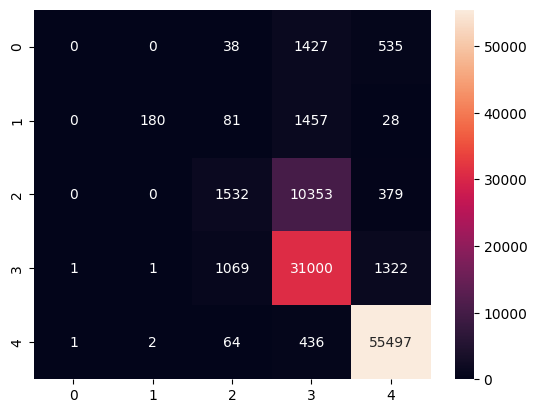

In [403]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It compares the predicted classifications to the actual classifications and helps in identifying the true positives, false positives, true negatives, and false negatives for each class. The rows of the confusion matrix represent the actual classes, while the columns represent the predicted classes. On the diagonal, we have the True Positives of the classes. For example, none of the elements that belong to category 0 were classified as category 0. Instead, they were all misclassified as category 2 (38), category 3 (1,427), and category 4 (535).

## Conclusion
Summarizing the findings

Based on both the confusion matrix and the classification report, we have the following:

Overall Accuracy: The model achieved an overall accuracy of 83.69%, indicating it correctly classified a large proportion of the test set. However, this accuracy does not equally reflect performance across all classes.

Class Imbalance and Misclassification:
- Category 0 (Analysis): The model struggles significantly with this class. As reflected in the confusion matrix, none of the actual instances of category 0 were correctly classified. Most were misclassified as category 3 (1,427 instances) and category 4 (535 instances). The precision and recall for this class are 0.00, showing the model cannot identify this class at all.
- Category 1 (Backdoor): Although precision for this class is relatively high at 0.98, the recall is very low (0.10), meaning the model rarely identifies instances of this class correctly. Most of the category 1 samples are also being misclassified as other classes.
- Category 2 (DoS): Performance for this class is also weak, with a precision of 0.55 and recall of 0.12. This indicates that a large portion of actual DoS instances are missed, and those identified as DoS may not be accurate.
- Category 3 (Exploits): This class performs much better, with a precision of 0.69 and recall of 0.93, indicating that most exploits are correctly identified, although some predictions are less accurate.
- Category 4 (Normal): The model performs best in identifying this class, with both precision and recall close to 1.00. This shows that the model is very accurate and consistent in recognizing normal traffic.

The model performs well for the "Normal" and "Exploits" classes but struggles considerably with minority classes like "Analysis," "Backdoor," and "DoS." The large imbalance in performance indicates that further tuning or handling of class imbalances is needed, especially for underrepresented or more difficult-to-identify categories.